<a href="https://colab.research.google.com/github/jcdevaney/data71200su24/blob/main/class5/data71200class5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# k-Nearest Neigbors Classification
#### class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, stratify=iris_dataset.target, random_state=66,test_size=0.2)

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.9583333333333334


### Comparing different values for k

In [5]:
# create a validation split

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_train, y_train, stratify=y_train, random_state=66,test_size=0.2)

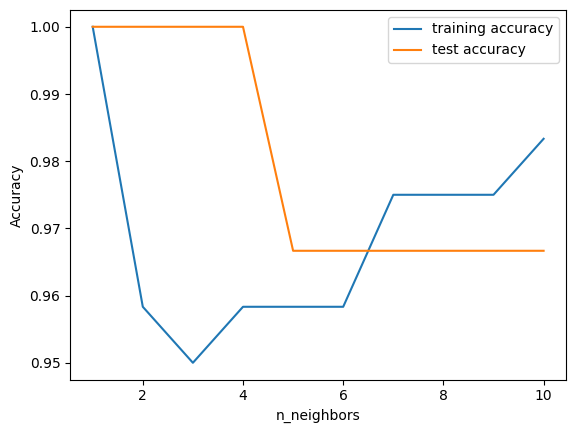

In [6]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Manhattan Distance (versus the default Minkowski distance tuned act like Euclidean Distance)

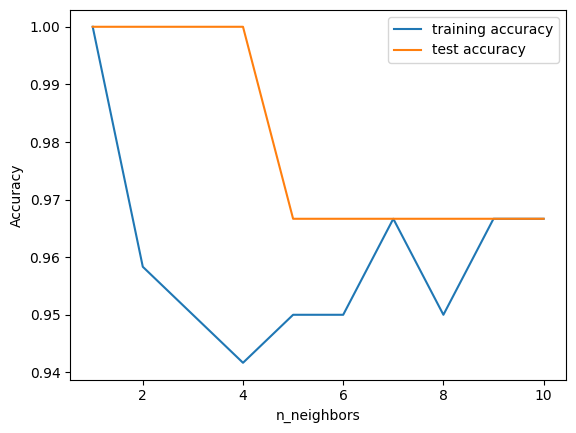

In [7]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Weighted with inverse of distance (versus the default uniform weighting)

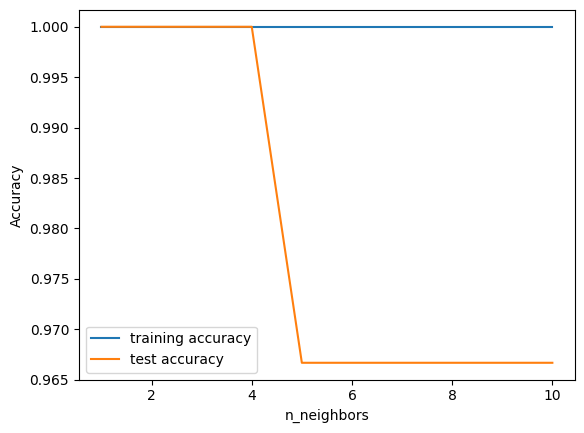

In [8]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Experimenting with changing the algorithm to compute nearest neighbors (‘ball_tree’, ‘kd_tree’ ,‘brute’,'auto)

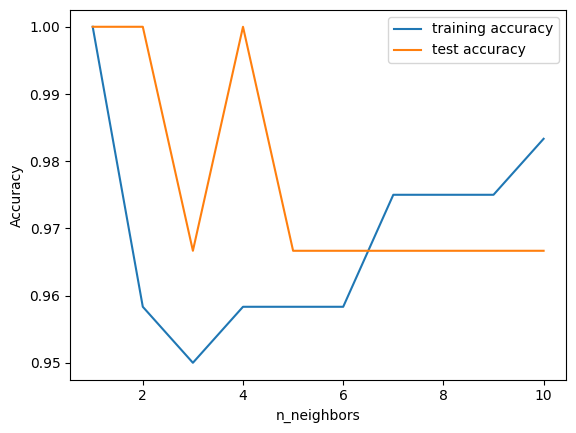

In [9]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Cross Validation

In [10]:
# cross validation on all of the data

# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores_all = cross_val_score(knn_cv, iris_dataset.data, iris_dataset.target, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
cv_scores mean:
0.9733333333333334


In [11]:
# cross validation on just training set

# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[1.         0.875      0.95833333 0.95833333 0.95833333]
cv_scores mean:
0.95


### Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

# parameter validation on training set

knn2 = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [13]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 8}

In [14]:
#accuracy of best performing k
knn_gscv.best_score_

0.975

In [15]:
# full cross valiadation results from grid search
knn_gscv.cv_results_

{'mean_fit_time': array([0.00120955, 0.00221529, 0.00155997, 0.00159769, 0.00280852,
        0.00265212, 0.00317721, 0.00182261, 0.00117002, 0.00117025,
        0.00256553, 0.00132141, 0.00111933, 0.00146747, 0.00123196,
        0.00150743, 0.00124612, 0.00214424, 0.00166931, 0.00348344,
        0.0024847 , 0.00571971, 0.00422797, 0.00168195]),
 'std_fit_time': array([2.31715258e-04, 1.37042899e-03, 6.17105565e-04, 7.03484978e-04,
        9.97224455e-04, 1.63934569e-03, 2.45407427e-03, 1.25446414e-03,
        1.04732112e-04, 7.96521612e-05, 2.33470775e-03, 9.34526139e-05,
        5.42695155e-05, 2.39026629e-04, 1.34351643e-04, 3.41890866e-04,
        1.53407014e-04, 1.05742179e-03, 7.37010433e-04, 3.79793199e-03,
        1.21212300e-03, 5.34204041e-03, 6.14586745e-03, 3.25249525e-04]),
 'mean_score_time': array([0.00894189, 0.01412344, 0.0050106 , 0.01602554, 0.01310019,
        0.03284655, 0.01047697, 0.00673828, 0.00712543, 0.00519152,
        0.00969028, 0.00552335, 0.00515218, 0.00

In [16]:
# accuracy of k = 8 on testing data (#1)
knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_train, y_train)
print("knn score: {}".format(knn8.score(X_test, y_test)))

knn score: 0.9666666666666667


In [17]:
# accuracy of k = 11 on testing data (lowest number tied for #2)
knn11 = KNeighborsClassifier(n_neighbors=3)
knn11.fit(X_train, y_train)
print("knn score: {}".format(knn11.score(X_test, y_test)))

knn score: 1.0


In [18]:
# accuracy of k = 4 on testing data (lowest number tied for #4 not a multiple of the class)
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)
print("knn score: {}".format(knn4.score(X_test, y_test)))

knn score: 1.0


### Metrics other than accuracy

In [19]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn8.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [20]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn11.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [21]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn4.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [22]:
# precision, recall, f1-score, plus support (number of instances of class)
from sklearn.metrics import classification_report
print(classification_report(y_test, knn8.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      0.90      0.95        10
     class 3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn11.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn4.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## k-Nearest Neigbors Regression

#### class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [26]:
# Import the California Housing Data from used in the HOML book, Chapter 2

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [27]:
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [28]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

housing = load_housing_data()

y = housing['median_house_value']
X = housing.drop(['median_house_value','ocean_proximity','total_bedrooms'],axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=3)

### Evaluation Metrics

In [30]:
#https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

print("Test set R^2: {:.2f}".format(reg.score(X_test2, y_test2)))

Test set R^2: 0.10


In [31]:
from sklearn.metrics import mean_squared_error
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test2, reg.predict(X_test2))))

Test set RMSE: 11845547034.66


In [32]:
from sklearn.metrics import mean_absolute_error
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test2, reg.predict(X_test2))))

Test set MSE: 83260.22
